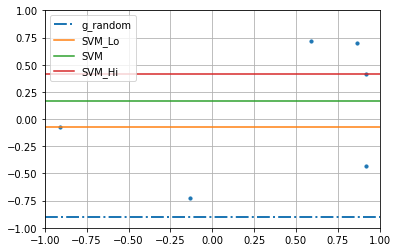

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt


def generateData():
    X = []
    Y = []
    #For lower half input-space
    for i in range(3):
        x1 = np.random.uniform(-1,1)
        x2 = np.random.uniform(-1,0)
        X.append([x1,x2])
        Y.append(-1)
        
    #For upper half input-space
    for i in range(3):
        x1 = np.random.uniform(-1,1)
        x2 = np.random.uniform(0,1)
        X.append([x1,x2])
        Y.append(1)

    return X, Y

def g_random(X,Y):
    a = np.random.uniform(-1,1)
    return a

def g_SVM(X,Y):
    H_Lo = -sys.maxsize -1
    H_Hi = sys.maxsize
    for i in range(len(X)):
        if Y[i] == -1:
            if X[i][1] > H_Lo:
                H_Lo = X[i][1]
        else:
            if X[i][1] < H_Hi:
                H_Hi = X[i][1]

    H_M = (H_Hi+H_Lo)/2
    return [H_Lo, H_M, H_Hi]
    
    
'''''''''''''''''''''''''''
Q3 Part A and B
'''''''''''''''''''''''''''
#Plot points
X,Y = generateData()
X1 = [i[0] for i in X]
X2 = [i[1] for i in X]
plt.scatter(X1,X2, s=10)

#Plot g_random
axes = plt.gca()
axes.set_xbound(lower=-1,upper=1)
x_vals = np.array(axes.get_xlim())
intercept = g_random(X,Y)
slope = 0
y_vals = intercept + slope*x_vals
plt.plot(x_vals, y_vals, '-.',label = 'g_random', linewidth=2.0)

#plot 3 lines for g_SVM
H = g_SVM(X,Y)
labels = ['SVM_Lo', 'SVM', 'SVM_Hi']
for i in range(len(H)):
    x_vals = np.array(axes.get_xlim())
    intercept = H[i]
    slope = 0
    y_vals = intercept + slope*x_vals
    plt.plot(x_vals, y_vals, '-', label = labels[i])
    
    
plt.axis([-1,1,-1,1])
plt.grid(True)
plt.legend()
plt.show()